In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import cv2
import itertools

import pickle

2023-12-04 10:43:06.299872: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-04 10:43:06.299930: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-04 10:43:06.299948: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-04 10:43:06.306174: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [7]:
# import tensorflow_datasets as tfds
# train_dataset, test_dataset = tfds.load('voc', split=['train', 'test'])
# image_list = list(train_dataset.take(10).as_numpy_iterator())

# with open("image_list.pkl", "wb") as fp:   #Pickling
#     pickle.dump(image_list, fp)


In [8]:
with open("image_list.pkl", "rb") as fp:   # Unpickling
    image_list = pickle.load(fp)

In [9]:
image_list[0]

{'image': array([[[101, 102,  32],
         [131, 132,  64],
         [106, 108,  43],
         ...,
         [ 58,  70,  22],
         [ 61,  73,  25],
         [ 61,  73,  27]],
 
        [[117, 120,  49],
         [124, 127,  58],
         [131, 133,  68],
         ...,
         [ 63,  72,  25],
         [ 67,  76,  29],
         [ 70,  79,  32]],
 
        [[135, 142,  72],
         [145, 152,  82],
         [137, 144,  76],
         ...,
         [ 76,  84,  35],
         [ 78,  86,  35],
         [ 78,  86,  35]],
 
        ...,
 
        [[129, 116, 126],
         [123, 111, 113],
         [109,  99,  87],
         ...,
         [ 19, 151, 130],
         [ 20, 149, 127],
         [ 20, 149, 129]],
 
        [[183, 167, 180],
         [120, 105, 110],
         [ 99,  86,  77],
         ...,
         [ 22, 151, 129],
         [ 22, 150, 127],
         [ 22, 149, 128]],
 
        [[196, 178, 192],
         [116,  99, 105],
         [ 90,  75,  68],
         ...,
         [ 23, 151,

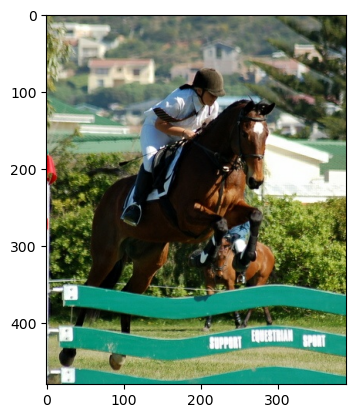

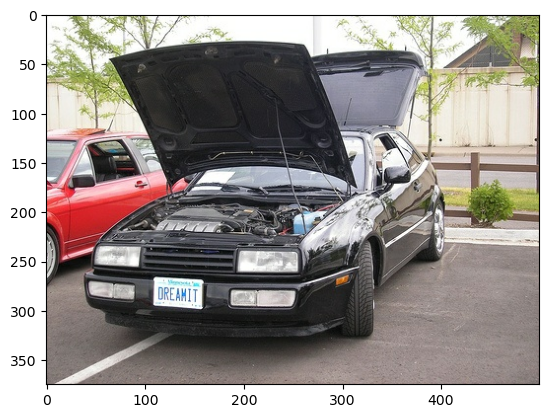

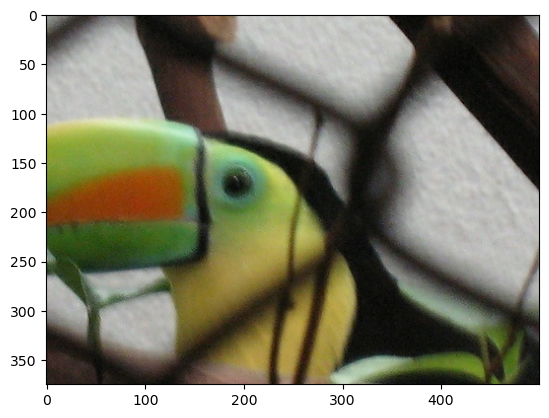

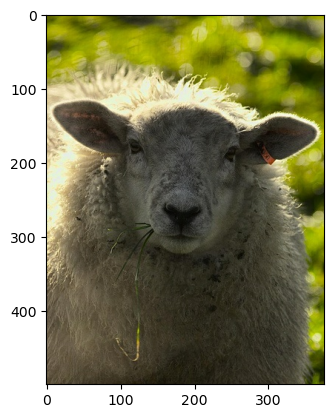

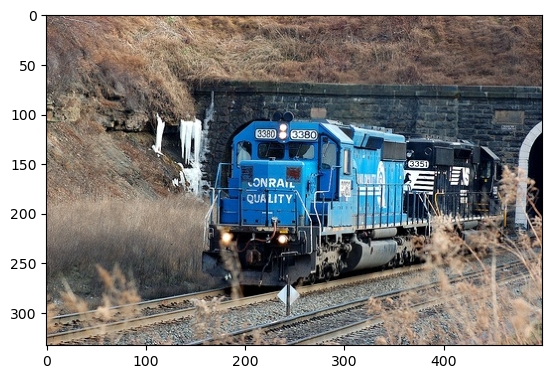

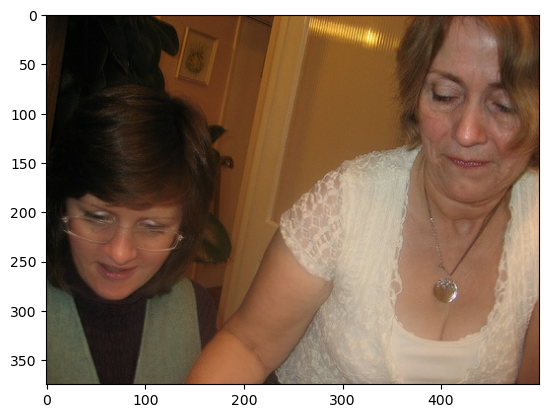

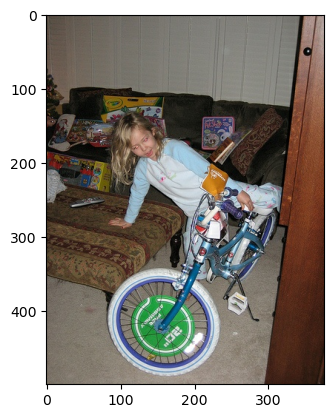

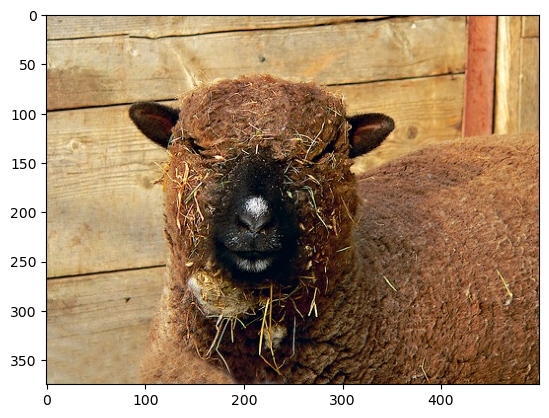

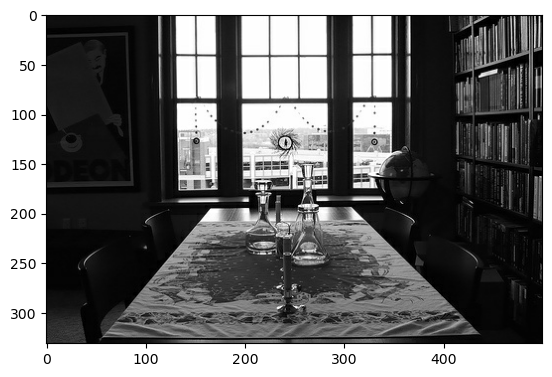

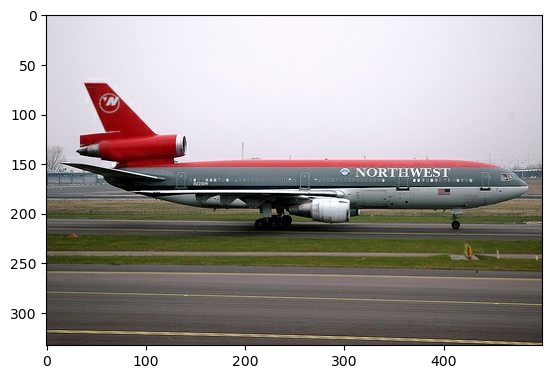

In [10]:
for i in range(10):
    plt.imshow(image_list[i]['image'])
    plt.show()


In [11]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.applications.vgg16 import decode_predictions

In [12]:
model = VGG16()

2023-11-01 23:00:58.640035: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1886] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 14604 MB memory:  -> device: 0, name: Tesla V100-PCIE-16GB, pci bus id: 0001:00:00.0, compute capability: 7.0


In [13]:
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

## Feature maps

In [14]:
input_image = cv2.resize(image_list[9]['image'], (224,224))
input_image = preprocess_input(input_image)



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


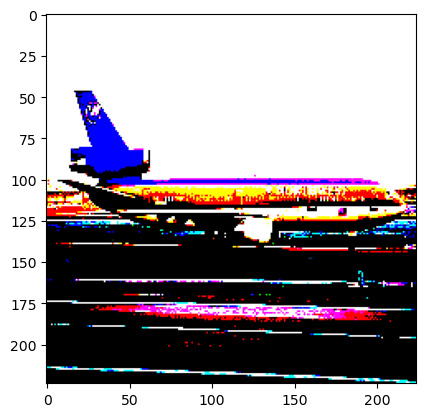

In [15]:
plt.imshow(input_image)
plt.show()

In [16]:
input_image[np.newaxis].shape

(1, 224, 224, 3)

In [17]:
decode_predictions(model.predict(input_image[None]),top=5)


2023-11-01 23:01:10.274551: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:442] Loaded cuDNN version 8800


1/1 [==============================] - 2s 2s/step


[[('n02690373', 'airliner', 0.97733796),
  ('n04592741', 'wing', 0.021947468),
  ('n04552348', 'warplane', 0.00070305547),
  ('n04266014', 'space_shuttle', 7.876363e-06),
  ('n02687172', 'aircraft_carrier', 2.072237e-06)]]

In [ ]:
feature_maps = tf.keras.Model(inputs = model.input, outputs=model.get_layer('block1_conv2').output)

In [ ]:
block1_conv2 = feature_maps.predict(input_image[None])

plt.imshow(block1_conv2[0,...,4])
plt.show()

In [ ]:
block1_conv2.shape

In [ ]:
feature_maps = tf.keras.Model(inputs = model.input, outputs=model.get_layer('block5_pool').output)

In [ ]:
block5_pool = feature_maps.predict(input_image[None])

plt.imshow(block5_pool[0,...,4])
plt.show()

## Why do we need to resize images?

In [ ]:
input_image = image_list[9]['image']
input_image = preprocess_input(input_image)
plt.imshow(input_image)
plt.show()

In [ ]:
model.predict(input_image[None])

In [ ]:
variable_size_model = VGG16(include_top=False,input_shape=(None,None,3))

In [ ]:
?VGG16

In [ ]:
variable_size_model.summary()

In [ ]:
feature_maps = tf.keras.Model(inputs = variable_size_model.input, outputs=variable_size_model.get_layer('block1_conv2').output)


In [ ]:
block1_conv2 = feature_maps.predict(input_image[None])

plt.imshow(block1_conv2[0,...,4])
plt.show()

In [ ]:
print(block1_conv2.shape)
print(input_image[None].shape)

In [ ]:
feature_maps = tf.keras.Model(inputs = variable_size_model.input, outputs=variable_size_model.get_layer('block5_pool').output)


In [ ]:
block5_pool = feature_maps.predict(input_image[None])

plt.imshow(block5_pool[0,...,4])
plt.show()

In [ ]:
print(block5_pool.shape)


# Object detection


Use the feature maps to predict objects in a region of the image

More difficult than classification and fewer off-the-shelf solutions but see https://keras.io/keras_cv/


![YOLO model.](images/yolo.png)


## Semantic segmentation


Pixel-wise classification

![YOLO model.](images/segmentation.png)


## A popular model is the UNET architecture

![UNET model.](images/unet.png)
